In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import lines
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
from astropy.io import fits
import sunpy.visualization.colormaps as cm
sohoeit195 = plt.get_cmap('sohoeit195')
from scipy import ndimage
plt.style.use('science')
rcParams['axes.linewidth'] = 1.2
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'cm'

In [2]:
print(cm.cmlist.keys())

dict_keys(['goes-rsuvi94', 'goes-rsuvi131', 'goes-rsuvi171', 'goes-rsuvi195', 'goes-rsuvi284', 'goes-rsuvi304', 'sdoaia94', 'sdoaia131', 'sdoaia171', 'sdoaia193', 'sdoaia211', 'sdoaia304', 'sdoaia335', 'sdoaia1600', 'sdoaia1700', 'sdoaia4500', 'sohoeit171', 'sohoeit195', 'sohoeit284', 'sohoeit304', 'soholasco2', 'soholasco3', 'sswidlsoholasco2', 'sswidlsoholasco3', 'stereocor1', 'stereocor2', 'stereohi1', 'stereohi2', 'rhessi', 'yohkohsxtal', 'yohkohsxtwh', 'hinodexrt', 'hinodesotintensity', 'trace171', 'trace195', 'trace284', 'trace1216', 'trace1550', 'trace1600', 'trace1700', 'traceWL', 'hmimag', 'irissji1330', 'irissji1400', 'irissji1600', 'irissji2796', 'irissji2832', 'irissji5000', 'irissjiFUV', 'irissjiNUV', 'irissjiSJI_NUV', 'kcor'])


In [2]:
hdul_B = fits.open("../src/secchi/20110311_160030_14euB.fts")
hdul_B.info()

Filename: ../src/secchi/20110311_160030_14euB.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     258   (2048, 2048)   float32   


In [4]:
hdul_B[0].header

SIMPLE  =                    T / Written by IDL:  Wed Sep 16 05:24:49 2020      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2 /                                                
NAXIS1  =                 2048 /                                                
NAXIS2  =                 2048 /                                                
DATE-OBS= '2011-03-11T16:00:57.347' /                                           
TIME_OBS= '        '           /                                                
FILEORIG= 'B31103IB.448'       /                                                
SEB_PROG= 'NORMAL  '           /                                                
SYNC    =                    F /                                                
SPWX    =                    F /                                                
EXPCMD  =              8.00358 /                                                
EXPTIME =              8.007

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


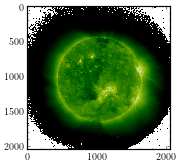

In [3]:
secchiB_img = hdul_B[0].data
plt.imshow(np.log10(secchiB_img),cmap=sohoeit195)

NameError: name 'secchiB_img' is not defined

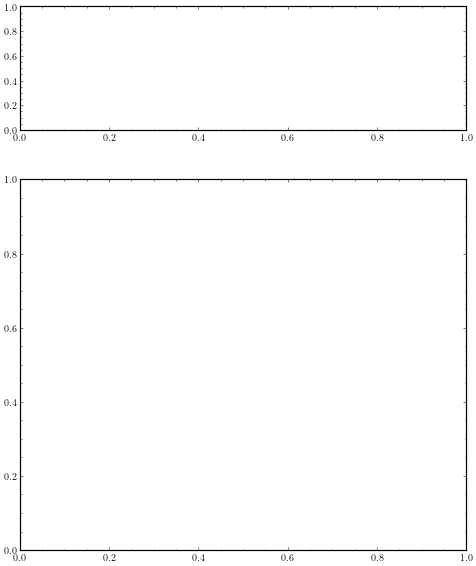

In [5]:
fig, ax = plt.subplots(2,1,figsize=(8,10),gridspec_kw={'height_ratios': [1, 3]})
vmin, vmax = np.log10(np.percentile(secchiB_img,[45,90]))
mu = 0.5
sigma = 0.1
secchiB_gamma = np.power((np.log10(secchiB_img)/(vmax-vmin)),0.7)*(vmax-vmin)
secchiB_gamma = np.nan_to_num(secchiB_gamma,vmin)
#secchiB_gauss = 1./np.sqrt(2*np.pi*sigma)*np.exp(-((secchiB_img/(vmax-vmin)) - mu)**2/(2*sigma**2))*(vmax-vmin)
im = ax[0].imshow(secchiB_gamma,origin="lower",cmap=sohoeit195,vmin=vmin,vmax=vmax,
          extent = [-1035.81 * 1.59, (2048-1035.81)* 1.59,-1050.49*1.59,(2048-1050.49)*1.59])
ax[0].tick_params(labelsize=16)
ax[0].set_xlim(-1200,1200)
ax[0].set_ylim(-1200,-600)
circle = plt.Circle((-450, -930), 250, color='r',fill=False)
ax[0].add_artist(circle)
ax[0].set_xlabel("Solar-X (arcsec)",fontsize=16)
ax[0].set_ylabel("Solar-Y (arcsec)",fontsize=16)
ax[0].set_yticks([-800,-1200])
ax[0].set_title("STEREO-B SECCHI EUVI 195 \mbox{\AA}",fontsize=16)
ax[0].text(1150,-1100,'2011-03-11 16:01:01',ha = 'right',va = 'center', color = 'white',fontsize = 16,linespacing=1.5)

secchiB_cut = secchiB_img[300:650,570:970]
vmin_cut, vmax_cut = np.log10(np.percentile(secchiB_cut,[20,95]))
secchiB_cut_gamma = np.power((np.log10(secchiB_cut)/(vmax_cut-vmin_cut)),0.25)*(vmax_cut-vmin_cut)
secchiB_cut_gamma = np.nan_to_num(secchiB_cut_gamma,vmin_cut)
secchiB_cut_lap = ndimage.laplace(secchiB_cut_gamma)
secchiB_cut_gauss = ndimage.fourier_gaussian(secchiB_cut_gamma,sigma=0.005).real
#secchiB_cut_gauss = secchiB_cut_gauss - ndimage.laplace(secchiB_cut_gauss)
secchiB_cut_gamma = secchiB_cut_gamma - secchiB_cut_lap
vmin_plot, vmax_plot = np.percentile(secchiB_cut_gauss,[15,99])

ax[1].imshow(secchiB_cut_gauss,origin="lower",cmap=sohoeit195,vmin=vmin_plot,vmax=vmax_plot,
            extent = [(-1035.81 + 570) * 1.59, (970-1035.81)* 1.59,(-1050.49 + 300)*1.59,(650-1050.49)*1.59])
ax[1].axis('scaled')
ax[1].set_ylim(-1100,-700)
ax[1].set_xlabel("Solar-X (arcsec)",fontsize=16)
ax[1].set_ylabel("Solar-Y (arcsec)",fontsize=16)
ax[1].tick_params(labelsize=16)
ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(5))
plt.subplots_adjust(bottom = 0.1,left=0.15,top=0.97,right=0.97)
#plt.savefig(fname = '../figs/secchi.pdf', dpi = 300, format = 'pdf')



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in power


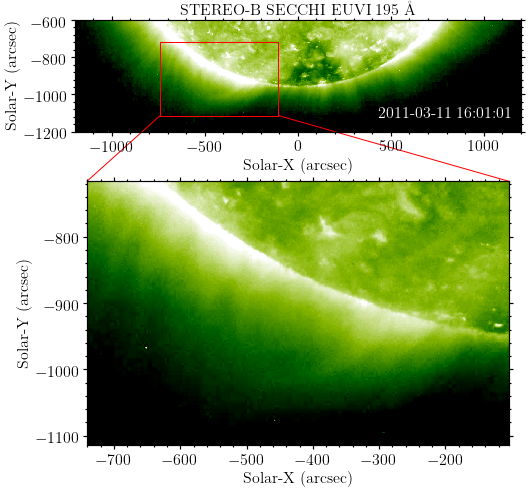

In [5]:
fig, ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1, 2]})
vmin, vmax = np.log10(np.percentile(secchiB_img,[45,90]))
mu = 1.7
sigma = 1.2
secchiB_gamma = np.power((np.log10(secchiB_img)/(vmax-vmin)),0.7)*(vmax-vmin)
secchiB_gamma = np.nan_to_num(secchiB_gamma,vmin)
#secchiB_gauss = 1./np.sqrt(2*np.pi*sigma)*np.exp(-((secchiB_img/(vmax-vmin)) - mu)**2/(2*sigma**2))*(vmax-vmin)
im = ax[0].imshow(secchiB_gamma,origin="lower",cmap=sohoeit195,vmin=vmin,vmax=vmax,
          extent = [-1035.81 * 1.59, (2048-1035.81)* 1.59,-1050.49*1.59,(2048-1050.49)*1.59])
ax[0].tick_params(labelsize=16)
ax[0].tick_params(axis='both',which='both',direction='out')
ax[0].tick_params(which="major",width=1.2,length=4)
ax[0].tick_params(which="minor",width=1.2,length=2)
ax[0].set_xlim(-1200,1200)
ax[0].set_ylim(-1200,-600)
circle = plt.Circle((-450, -930), 250, color='r',fill=False)
rec = patches.Rectangle(((-1035.81 + 570) * 1.59,(-1050.49 + 350)*1.59),400*1.59,250*1.59,linewidth=1,edgecolor='r',facecolor='none')
ax[0].add_patch(rec)
ax[0].set_xlabel("Solar-X (arcsec)",fontsize=16)
ax[0].set_ylabel("Solar-Y (arcsec)",fontsize=16)
ax[0].set_title("STEREO-B SECCHI EUVI 195 \mbox{\AA}",fontsize=16)
ax[0].text(1150,-1100,'2011-03-11 16:01:01',ha = 'right',va = 'center', color = 'white',fontsize = 16,linespacing=1.5)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))

secchiB_cut = secchiB_img[350:600,570:970]
vmin_cut, vmax_cut = np.log10(np.percentile(secchiB_cut,[1,90]))
secchiB_cut_gauss = 1./np.sqrt(2*np.pi*sigma)*np.exp(-(((np.log10(secchiB_cut)-vmin_cut)/(vmax_cut-vmin_cut)) - mu)**2/(2*sigma**2))*(vmax_cut-vmin_cut)

secchiB_cut_gamma = np.power(((np.log10(secchiB_cut)-vmin_cut)/(vmax_cut-vmin_cut)),0.6)*(vmax_cut-vmin_cut)
secchiB_cut_gamma = np.nan_to_num(secchiB_cut_gamma,0)
secchiB_cut_lap = ndimage.laplace(secchiB_cut_gamma)
secchiB_cut_fourgauss = ndimage.fourier_gaussian(secchiB_cut_gauss,sigma=0.1).real
#secchiB_cut_fourgauss = secchiB_cut_fourgauss - ndimage.laplace(secchiB_cut_fourgauss)
#secchiB_cut_gamma = secchiB_cut_gamma - secchiB_cut_lap
vmin_plot, vmax_plot = np.percentile(secchiB_cut_fourgauss,[1,99])
#vmin_plot, vmax_plot = np.percentile(secchiB_cut_gamma,[5,99.5])

ax[1].imshow(secchiB_cut_fourgauss,origin="lower",cmap=sohoeit195,vmin=vmin_plot,vmax=vmax_plot,
            extent = [(-1035.81 + 570) * 1.59, (970-1035.81)* 1.59,(-1050.49 + 350)*1.59,(600-1050.49)*1.59])
ax[1].axis('scaled')
ax[1].set_xlabel("Solar-X (arcsec)",fontsize=16)
ax[1].set_ylabel("Solar-Y (arcsec)",fontsize=16)
ax[1].tick_params(labelsize=16)
ax[1].tick_params(axis='both',which='both',direction='out')
ax[1].tick_params(which="major",width=1.2,length=4)
ax[1].tick_params(which="minor",width=1.2,length=2)
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(4))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(5))

con1 = patches.ConnectionPatch(xyA=((-1035.81 + 570) * 1.59,(-1050.49 + 350)*1.59), xyB=((-1035.81 + 570) * 1.59,(-1050.49 + 600)*1.59),
                      coordsA="data", coordsB="data",axesA=ax[0], axesB=ax[1], color="red")
con2 = patches.ConnectionPatch(xyA=((-1035.81 + 970) * 1.59,(-1050.49 + 350)*1.59), xyB=((-1035.81 + 970) * 1.59,(-1050.49 + 600)*1.59),
                      coordsA="data", coordsB="data",axesA=ax[0], axesB=ax[1], color="red")
ax[0].add_artist(con1)
ax[0].add_artist(con2)

#plt.subplots_adjust(bottom = 0.08,left=0.15,top=0.97,right=0.97)
plt.savefig(fname = '../figs/secchi.pdf', dpi = 300, format = 'pdf')



(array([ 2653., 16707., 12367., 10879., 10675., 10541., 20720., 25163.,
         8272.,  2023.]),
 array([-0.74638826, -0.5253575 , -0.3043267 , -0.08329596,  0.1377348 ,
         0.35876557,  0.5797963 ,  0.8008271 ,  1.0218579 ,  1.2428887 ,
         1.4639194 ], dtype=float32),
 <a list of 10 Patch objects>)

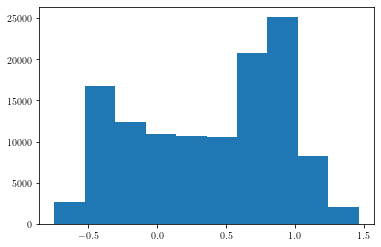

In [260]:
plt.hist(((np.log10(secchiB_cut)-vmin_cut)/(vmax_cut-vmin_cut)).flatten())

In [263]:
secchiB_cut_gauss[125,250]

0.32786372